In [1]:
import pandas as pd
import numpy as np


In [2]:
meta=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/feb11_2024/caqtls_microglia_formatted.tsv", sep="\t", header=0)


In [3]:
meta = meta[~np.isnan(meta["POS"])]
print(meta.head())

        PeakID Top_SNP_perPeak  Z_score_perPeak  pVal_perPeak  \
0  Peak_100075        rs281785         -8.42764  2.782460e-16   
1  Peak_100119       rs2033804         -4.61924  9.151825e-05   
2  Peak_100143       rs2287012         -4.74954  4.913505e-04   
3   Peak_10016      rs10752994          9.37451  3.808717e-19   
4   Peak_10018      rs12123755          8.27532  8.271750e-15   

   FDR_acrossAllPeaks   Chr non-effect_allele effect_allele         Peak  \
0        1.245536e-13  chr2                 A             G  Peak_100075   
1        5.522434e-03  chr2                 A             T  Peak_100119   
2        2.272244e-02  chr2                 T             C  Peak_100143   
3        2.532563e-16  chr1                 A             G   Peak_10016   
4        3.013410e-12  chr1                 C             T   Peak_10018   

   caQTL_order     Variant      Beta  Z_score_fixed  Z_score_random CHROM  \
0            1    rs281785  1.293180       10.11000        10.11000  chr2  

In [4]:
meta.columns

Index(['PeakID', 'Top_SNP_perPeak', 'Z_score_perPeak', 'pVal_perPeak',
       'FDR_acrossAllPeaks', 'Chr', 'non-effect_allele', 'effect_allele',
       'Peak', 'caQTL_order', 'Variant', 'Beta', 'Z_score_fixed',
       'Z_score_random', 'CHROM', 'POS'],
      dtype='object')

In [5]:
meta = meta[["CHROM", "POS", "non-effect_allele", "effect_allele", "Top_SNP_perPeak", "Z_score_fixed", "Beta"]]
meta.shape

(4978, 7)

In [6]:
meta.head()

,CHROM,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Z_score_fixed,Beta
0,chr2,199884843.0,A,G,rs281785,10.11000,1.293180
1,chr2,200357680.0,A,T,rs2033804,-3.48053,-0.396164
2,chr2,200656660.0,T,C,rs2287012,-5.07707,-0.498759
3,chr1,172585461.0,A,G,rs10752994,-11.41800,-1.070820
4,chr1,172625478.0,C,T,rs12123755,8.27532,0.816922


In [7]:
peaks=pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/feb11_2024/PeakInfoDetailed_210832_OCRs.csv", sep=",", header=0)

In [8]:
print(peaks.head())
print(peaks.shape)
#peaks["start"] = ((peaks["start"]+peaks["end"]) // 2) - 100
#peaks["end"] = peaks["start"]  + 200

    Chr   start     end   PeakID  distanceToTSS annotationSimple  \
0  chr1  817105  817588  Peak_13            0.0         Promoter   
1  chr1  819868  820628  Peak_14        -2157.0         Promoter   
2  chr1  820873  821328  Peak_15        -3162.0           Intron   
3  chr1  826886  828002  Peak_16            0.0         Promoter   
4  chr1  869728  870232  Peak_17            0.0         Promoter   

                                          annotation Associated.Gene.Name  \
0                                   Promoter (<=1kb)               FAM87B   
1                                   Promoter (2-3kb)           AL669831.4   
2  Intron (ENST00000635509/ENSG00000230021, intro...           AL669831.4   
3                                   Promoter (<=1kb)            LINC00115   
4                                   Promoter (<=1kb)               FAM41C   

                            Gene.type  
0                             lincRNA  
1  transcribed_unprocessed_pseudogene  
2  trans

In [9]:
preds = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/ATAC_new/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
preds["sign.jsd.mean"] = preds["jsd.mean"]*np.sign(preds["logfc.mean"])
preds = preds[["chr", "pos", "rsid","allele1", "allele2", "logfc.mean",  "sign.jsd.mean"]]
preds.head()
print(preds.shape)

(4978, 7)


In [10]:
print(meta.shape)

(4978, 7)


In [11]:
preds.head()

,chr,pos,rsid,allele1,allele2,logfc.mean,sign.jsd.mean
0,chr2,199884843.0,chr2_199884843.0_G_A,G,A,0.032774,0.016354
1,chr2,200357680.0,chr2_200357680.0_T_A,T,A,-0.008075,-0.009565
2,chr2,200656660.0,chr2_200656660.0_C_T,C,T,0.003838,0.004759
3,chr1,172585461.0,chr1_172585461.0_G_A,G,A,0.005939,0.004529
4,chr1,172625478.0,chr1_172625478.0_T_C,T,C,-0.441283,-0.047415


In [12]:
meta["POS"] = meta["POS"].astype(int) 
preds["pos"] = preds["pos"].astype(int) 
final = meta.merge(preds, left_on=["CHROM", "POS", "effect_allele", "non-effect_allele"], right_on=["chr", "pos", "allele1", "allele2"]).drop_duplicates()
print(final.shape)


(4978, 14)


In [13]:
final.head()

,CHROM,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Z_score_fixed,Beta,chr,pos,rsid,allele1,allele2,logfc.mean,sign.jsd.mean
0,chr2,199884843,A,G,rs281785,10.11000,1.293180,chr2,199884843,chr2_199884843.0_G_A,G,A,0.032774,0.016354
1,chr2,200357680,A,T,rs2033804,-3.48053,-0.396164,chr2,200357680,chr2_200357680.0_T_A,T,A,-0.008075,-0.009565
2,chr2,200656660,T,C,rs2287012,-5.07707,-0.498759,chr2,200656660,chr2_200656660.0_C_T,C,T,0.003838,0.004759
3,chr1,172585461,A,G,rs10752994,-11.41800,-1.070820,chr1,172585461,chr1_172585461.0_G_A,G,A,0.005939,0.004529
4,chr1,172625478,C,T,rs12123755,8.27532,0.816922,chr1,172625478,chr1_172625478.0_T_C,T,C,-0.441283,-0.047415


In [14]:
final.columns

Index(['CHROM', 'POS', 'non-effect_allele', 'effect_allele', 'Top_SNP_perPeak',
       'Z_score_fixed', 'Beta', 'chr', 'pos', 'rsid', 'allele1', 'allele2',
       'logfc.mean', 'sign.jsd.mean'],
      dtype='object')

In [15]:
cols = ['CHROM', "POS0", 'POS', 'non-effect_allele', 'effect_allele', 'Top_SNP_perPeak',
       'Z_score_fixed', 'logfc.mean', 'sign.jsd.mean', 'Beta', 'rsid']
final["POS0"] = final["POS"] - 1
finalf = final[cols]

In [16]:
peaks

,Chr,start,end,PeakID,distanceToTSS,annotationSimple,annotation,Associated.Gene.Name,Gene.type
0,chr1,817105,817588,Peak_13,0.0,Promoter,Promoter (<=1kb),FAM87B,lincRNA
1,chr1,819868,820628,Peak_14,-2157.0,Promoter,Promoter (2-3kb),AL669831.4,transcribed_unprocessed_pseudogene
2,chr1,820873,821328,Peak_15,-3162.0,Intron,"Intron (ENST00000635509/ENSG00000230021, intro...",AL669831.4,transcribed_unprocessed_pseudogene
3,chr1,826886,828002,Peak_16,0.0,Promoter,Promoter (<=1kb),LINC00115,lincRNA
4,chr1,869728,870232,Peak_17,0.0,Promoter,Promoter (<=1kb),FAM41C,lincRNA
...,...,...,...,...,...,...,...,...,...
210827,chrY,21439802,21440929,Peak_215075,-2558.0,Promoter,Promoter (2-3kb),RBMY2TP,unprocessed_pseudogene
210828,chrY,21481590,21481950,Peak_215076,-11569.0,Distal Intergenic,Distal Intergenic,RBMY1HP,unprocessed_pseudogene
210829,chrY,26403079,26403631,Peak_215077,2469.0,Promoter,Promoter (2-3kb),CYCSP48,processed_pseudogene
210830,chrY,26436428,26436771,Peak_215078,-17211.0,Distal Intergenic,Distal Intergenic,AC013734.1,processed_pseudogene


In [17]:
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(finalf)
peak_bed =  pybedtools.BedTool.from_dataframe(peaks)
sig_vars_in_bed = beds_var.intersect(peak_bed, c=True)

In [18]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=cols+["IsUsed"]).drop_duplicates()


In [19]:
sig_vars_in_bed.head()

,CHROM,POS0,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Z_score_fixed,logfc.mean,sign.jsd.mean,Beta,rsid,IsUsed
0,chr2,199884842,199884843,A,G,rs281785,10.11000,0.032774,0.016354,1.293180,chr2_199884843.0_G_A,0
1,chr2,200357679,200357680,A,T,rs2033804,-3.48053,-0.008075,-0.009565,-0.396164,chr2_200357680.0_T_A,0
2,chr2,200656659,200656660,T,C,rs2287012,-5.07707,0.003838,0.004759,-0.498759,chr2_200656660.0_C_T,0
3,chr1,172585460,172585461,A,G,rs10752994,-11.41800,0.005939,0.004529,-1.070820,chr1_172585461.0_G_A,0
4,chr1,172625477,172625478,C,T,rs12123755,8.27532,-0.441283,-0.047415,0.816922,chr1_172625478.0_T_C,1


In [20]:
sig_vars_in_bed["IsUsed"] = sig_vars_in_bed["IsUsed"] > 0

In [21]:
sum(sig_vars_in_bed["IsUsed"])

956

In [22]:
sig_vars_in_bed.shape

(4978, 12)

In [23]:
# sig_vars_in_bed["logfc.mean"] = -1*sig_vars_in_bed["logfc.mean"]

In [24]:
# sig_vars_in_bed["sign.jsd.mean"] = -1*sig_vars_in_bed["sign.jsd.mean"]

sig_vars_in_bed["Z_score_fixed"] = -1*sig_vars_in_bed["Z_score_fixed"]
sig_vars_in_bed["Beta"] = -1*sig_vars_in_bed["Beta"]

In [25]:
#sig_vars_in_bed.to_csv("../final_figures_new/microglia.caqtls.tsv", sep="\t", header=True, index=False)

In [26]:
import matplotlib.pyplot as plt

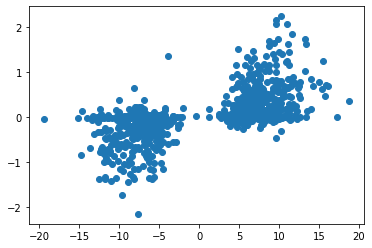

In [27]:
df=sig_vars_in_bed[sig_vars_in_bed["IsUsed"]]
plt.scatter(df["Z_score_fixed"], df["logfc.mean"])

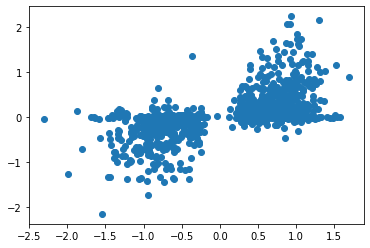

In [28]:
df=sig_vars_in_bed[sig_vars_in_bed["IsUsed"]]
plt.scatter(df["Beta"], df["logfc.mean"])

In [29]:
import scipy.stats
scipy.stats.pearsonr(df["Z_score_fixed"], df["logfc.mean"])

(0.6123604665289462, 1.836191629240661e-99)

In [30]:
scipy.stats.pearsonr(df["Beta"], df["logfc.mean"])

(0.6008602589871562, 7.009265665336843e-95)

In [31]:
df["abs_beta"] = abs(df["Z_score_fixed"])
dff = df.sort_values('abs_beta', ascending=False).drop_duplicates('rsid', keep="first").sort_index()

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
dff.shape

(877, 13)

In [33]:
dff.columns

Index(['CHROM', 'POS0', 'POS', 'non-effect_allele', 'effect_allele',
       'Top_SNP_perPeak', 'Z_score_fixed', 'logfc.mean', 'sign.jsd.mean',
       'Beta', 'rsid', 'IsUsed', 'abs_beta'],
      dtype='object')

In [34]:
sig_vars_in_bed.columns

Index(['CHROM', 'POS0', 'POS', 'non-effect_allele', 'effect_allele',
       'Top_SNP_perPeak', 'Z_score_fixed', 'logfc.mean', 'sign.jsd.mean',
       'Beta', 'rsid', 'IsUsed'],
      dtype='object')

In [35]:
sig_vars_in_bed["isused"] = sig_vars_in_bed[['rsid', 'Beta']].isin(dff[['rsid', 'Beta']]).all(axis=1)

In [36]:
sum(sig_vars_in_bed["isused"])

877

In [37]:
sig_vars_in_bed.columns

Index(['CHROM', 'POS0', 'POS', 'non-effect_allele', 'effect_allele',
       'Top_SNP_perPeak', 'Z_score_fixed', 'logfc.mean', 'sign.jsd.mean',
       'Beta', 'rsid', 'IsUsed', 'isused'],
      dtype='object')

In [38]:
rename_dict = {'CHROM': "var.chr",
                'POS': "var.pos_hg38",
                'non-effect_allele': "var.allele1",
                'effect_allele': "var.allele2",
                'Z_score_fixed': "obs.Z_score_fixed", 
                'Beta': "obs.Beta",
                'logfc.mean': "pred.chrombpnet.microglia.varscore.logfc",
                'sign.jsd.mean': "pred.chrombpnet.microglia.varscore.jsd",
                'isused': "var.isused",
                  'Top_SNP_perPeak': 'var.Top_SNP_perPeak',
                 'rsid': 'var.rsid'}

In [39]:
data = sig_vars_in_bed.rename(columns=rename_dict)

In [40]:
data.columns

Index(['var.chr', 'POS0', 'var.pos_hg38', 'var.allele1', 'var.allele2',
       'var.Top_SNP_perPeak', 'obs.Z_score_fixed',
       'pred.chrombpnet.microglia.varscore.logfc',
       'pred.chrombpnet.microglia.varscore.jsd', 'obs.Beta', 'var.rsid',
       'IsUsed', 'var.isused'],
      dtype='object')

In [41]:
use_cols=['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2',
       'obs.Z_score_fixed', 'obs.Beta',
       'pred.chrombpnet.microglia.varscore.logfc',
       'pred.chrombpnet.microglia.varscore.jsd', 'var.isused', 'var.rsid', 'var.Top_SNP_perPeak']

In [42]:
dataf = data[use_cols]


In [43]:
dataf_final = dataf[dataf["var.isused"]]
dataf_final = dataf_final.drop(["var.isused"], axis=1)
dataf.to_csv("full_variants/caqtls.microglia.benchmarking.all.tsv", sep='\t', header=True, index=False)
dataf_final.to_csv("filtered_variants/caqtls.microglia.benchmarking.chrombpnet.tsv", sep='\t', header=True, index=False)

In [44]:
dataf_final.shape

(877, 10)

In [47]:
dataf.columns

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2',
       'obs.Z_score_fixed', 'obs.Beta',
       'pred.chrombpnet.microglia.varscore.logfc',
       'pred.chrombpnet.microglia.varscore.jsd', 'var.isused', 'var.rsid',
       'var.Top_SNP_perPeak'],
      dtype='object')

In [48]:
dataf.head(1)

,var.chr,var.pos_hg38,var.allele1,var.allele2,obs.Z_score_fixed,obs.Beta,pred.chrombpnet.microglia.varscore.logfc,pred.chrombpnet.microglia.varscore.jsd,var.isused,var.rsid,var.Top_SNP_perPeak
0,chr2,199884843,A,G,-10.11,-1.29318,0.032774,0.016354,False,chr2_199884843.0_G_A,rs281785


In [49]:
readme_data = {'var.chr' : "Chromosome of the variant (GRCh38)", 
        'var.pos_hg38': "Position of the variant (GRCh38, 1-based)",
        'var.allele1': "Allele1 for the variant", 
        'var.allele2': "Allele2 for the variant",        
       'obs.Beta': "Observed effect size", 
       'var.isused': "True if variant is used in final ChromBPNet benchmarking",
       'pred.chrombpnet.microglia.varscore.logfc': "ChromBPNet logFC predictions in Microglia",
       'pred.chrombpnet.microglia.varscore.jsd':  "ChromBPNet JSD predictions in Microglia", 
        'obs.Z_score_fixed': "variant attribute accompanied with original source",
        'var.Top_SNP_perPeak': "variant attribute accompanied with original source",
      'var.rsid': "Variant identifier"
 }


In [50]:
f = open("full_variants/caqtls.microglia.benchmarking.all.README", "w")
f.write("# TSV Field Header Descriptions \n \n")
for val in readme_data:
    print(val)
    f.write(val+" : "+readme_data[val]+"\n")
f.write("\n")
f.write("# Experiment-Specific Headers and IDs  \n")
f.close()

var.chr
var.pos_hg38
var.allele1
var.allele2
obs.Beta
var.isused
pred.chrombpnet.microglia.varscore.logfc
pred.chrombpnet.microglia.varscore.jsd
obs.Z_score_fixed
var.Top_SNP_perPeak
var.rsid
